In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

# Carregar os dados
df = pd.read_csv('heart.csv')

# Visualizar primeiras linhas
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

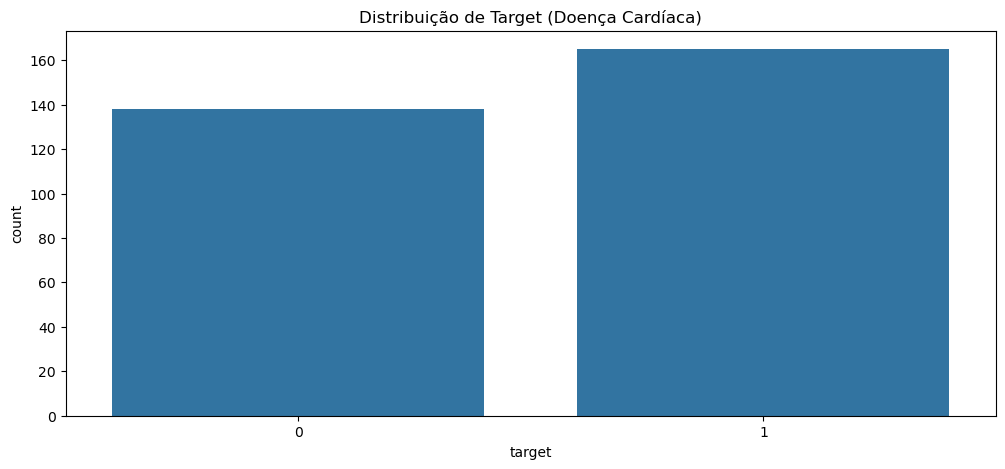

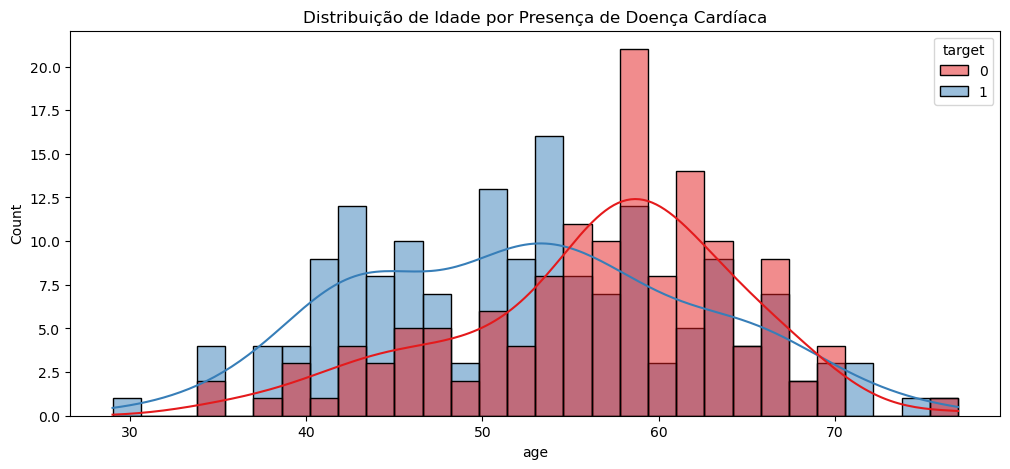

In [4]:
plt.figure(figsize=(12,5))
sns.countplot(x='target', data=df)
plt.title('Distribuição de Target (Doença Cardíaca)')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(data=df, x='age', hue='target', bins=30, kde=True, palette='Set1')
plt.title('Distribuição de Idade por Presença de Doença Cardíaca')
plt.show()



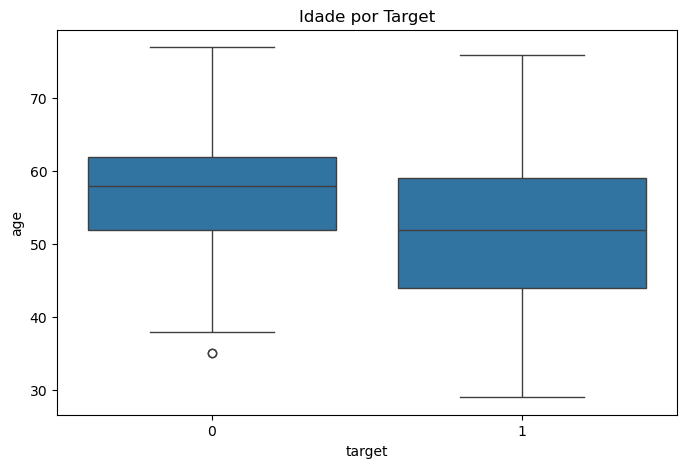

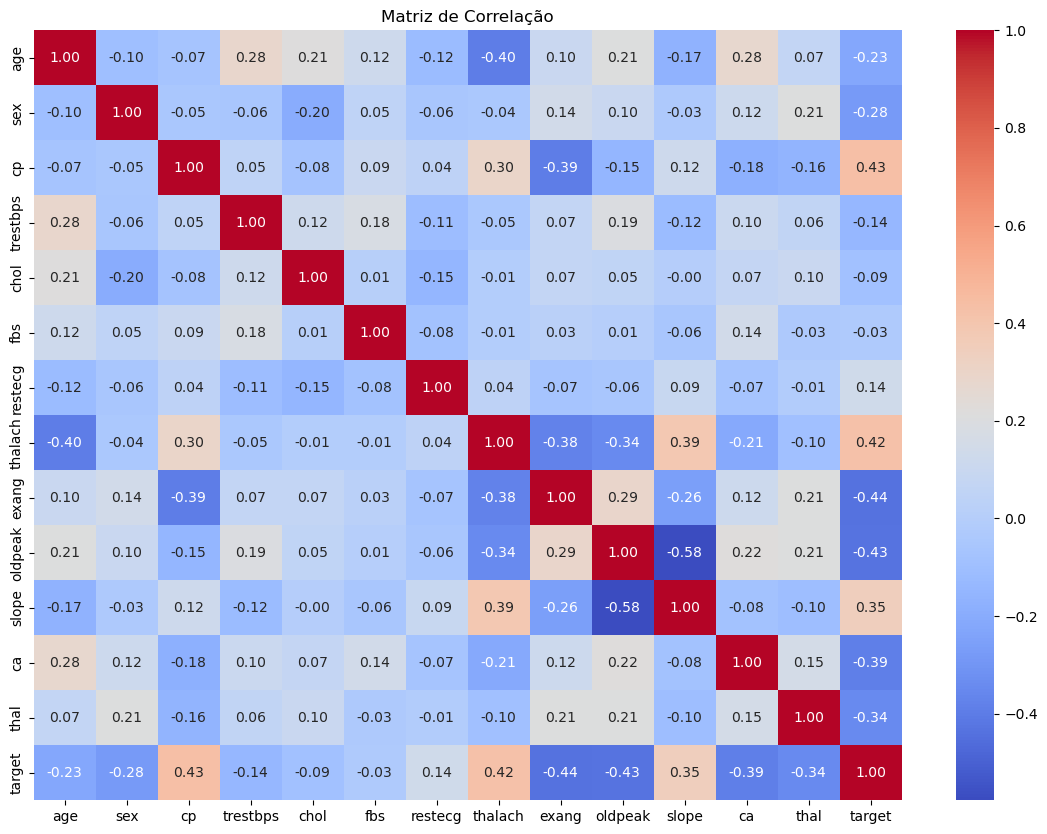

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='age', data=df)
plt.title('Idade por Target')
plt.show()

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()



In [7]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
models = {
    'Regressão Logística': LogisticRegression(random_state=42, max_iter=1000),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5)
}


In [9]:
results = []

for name, model in models.items():
    if name in ['Regressão Logística', 'KNN (k=5)']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_proba = model.predict_proba(X_test_scaled)[:,1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Modelo': name,
        'Acurácia': acc,
        'Precisão': prec,
        'Recall': rec,
        'F1-Score': f1,
        'y_proba': y_proba,
        'y_test': y_test,
        'y_pred': y_pred
    })


In [10]:
res_df = pd.DataFrame(results)[['Modelo', 'Acurácia', 'Precisão', 'Recall', 'F1-Score']]
print(res_df)


                Modelo  Acurácia  Precisão    Recall  F1-Score
0  Regressão Logística  0.803279  0.769231  0.909091  0.833333
1    Árvore de Decisão  0.704918  0.702703  0.787879  0.742857
2        Random Forest  0.836066  0.780488  0.969697  0.864865
3            KNN (k=5)  0.803279  0.769231  0.909091  0.833333


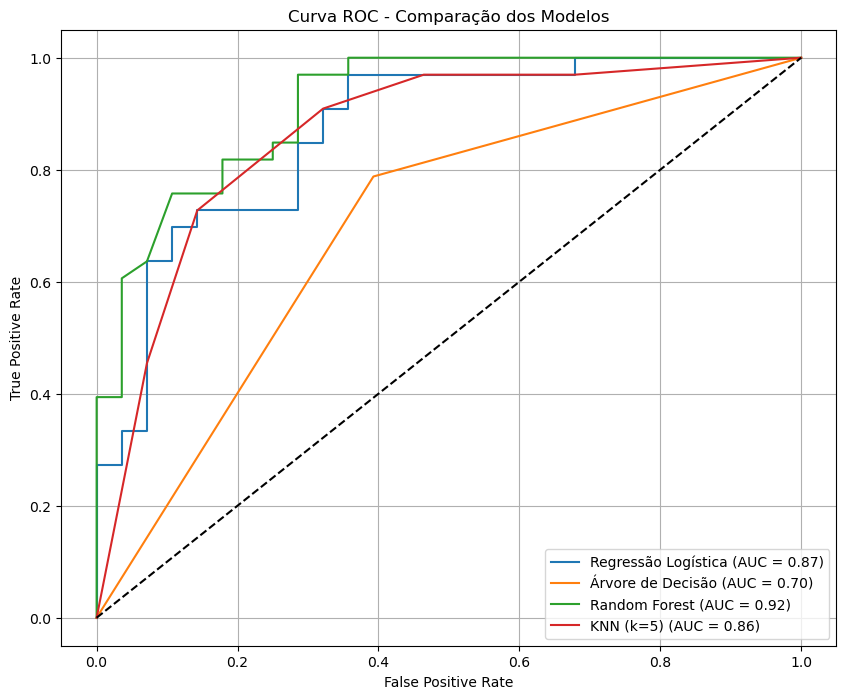

In [11]:
plt.figure(figsize=(10,8))
for r in results:
    fpr, tpr, _ = roc_curve(r['y_test'], r['y_proba'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{r['Modelo']} (AUC = {roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Comparação dos Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [12]:
best_model = next(r for r in results if r['Modelo'] == 'Random Forest')
print("Relatório detalhado do modelo Random Forest:\n")
print(classification_report(best_model['y_test'], best_model['y_pred']))


Relatório detalhado do modelo Random Forest:

              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



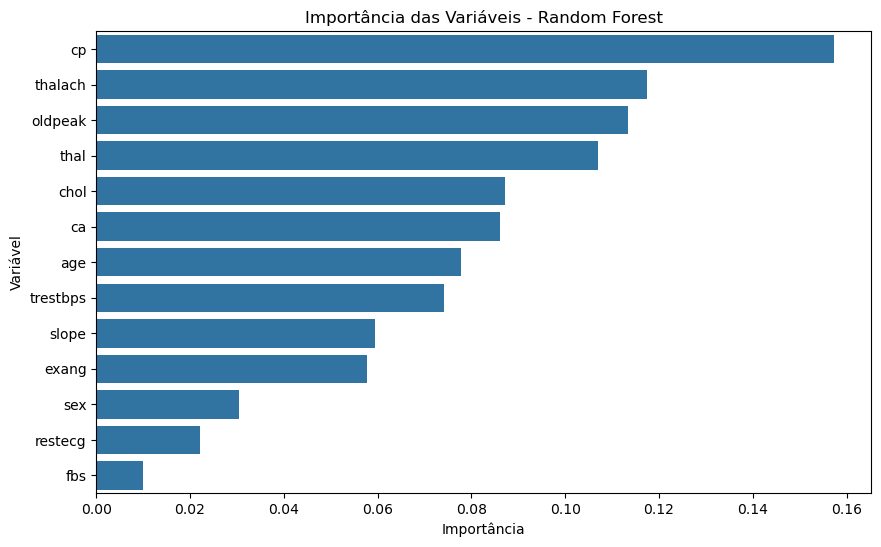

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feat_names = X.columns

feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Importância das Variáveis - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()
